In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from pandas import ExcelFile
#from pandas import ExcelWriter

In [2]:
df = pd.read_excel('brands_data.xlsx')

In [3]:
df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Milksnob,/art and entertainment/shows and events,Art,2018-01-02,2018-06-11,3.0,0.0,United States
2,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,NaN,NaN,NaN,2018-01-02,2018-01-12,1.0,0.0,NaN
4,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [4]:
df1 = df.dropna(subset=['name'])

In [5]:
df1.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
1,Milksnob,/art and entertainment/shows and events,Art,2018-01-02,2018-06-11,3.0,0.0,United States
7,Baseball Much,/sports/baseball,Sports,2018-01-03,2018-01-03,1.0,0.0,NaN
11,Stargraph,/automotive and vehicles/motorcycles,Automobiles,2018-01-04,2018-08-28,1.0,0.0,NaN
15,Enflux,NaN,Software & Services,2018-01-04,2018-01-04,1.0,0.0,NaN
23,Major League Girls,/sports/softball,Sports,2018-01-05,2018-01-07,1.0,0.0,NaN


In [6]:
df1.reset_index(inplace=True,drop=True)
df1

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,Art,2018-01-02,2018-06-11,3.0,0.0,United States
1,Baseball Much,/sports/baseball,Sports,2018-01-03,2018-01-03,1.0,0.0,NaN
2,Stargraph,/automotive and vehicles/motorcycles,Automobiles,2018-01-04,2018-08-28,1.0,0.0,NaN
3,Enflux,NaN,Software & Services,2018-01-04,2018-01-04,1.0,0.0,NaN
4,Major League Girls,/sports/softball,Sports,2018-01-05,2018-01-07,1.0,0.0,NaN
5,Global Dinners,NaN,Food Distributors,2018-01-05,2018-02-12,2.0,0.0,NaN
6,Badger Sport,/style and fashion/clothing/hoodies,Apparel,2018-01-08,2018-01-08,1.0,0.0,NaN
7,AlfaPeople,NaN,Software & Services,2018-01-09,2018-01-09,1.0,0.0,NaN
8,UHWK,/sports/hockey,Sports,2018-01-10,2018-06-28,3.0,0.0,Canada
9,GoKid,/family and parenting/children,Family,2018-01-10,2018-01-28,1.0,0.0,NaN


In [7]:
df1['diff'] = df1['last_active'] - df1['created']
#print(type(country))
df1['diff'] = df1['diff'].dt.days.astype('int16')

differ = df1[df1['diff'] >= 300]
#diff1 = diff[diff['address_country']=='United States']
differ.sort_values(by=['diff'],inplace=True,ascending=False)
each = differ.groupby('address_country').size().reset_index(name='counts')
differ1 = differ.groupby('product_category').size().reset_index(name='counts')
differ1.sort_values(by=['counts'],inplace=True,ascending=False)
print(len(differ))
each


27


c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCop

,address_country,counts
0,Australia,1
1,Brazil,1
2,Canada,1
3,Finland,1
4,United States,20


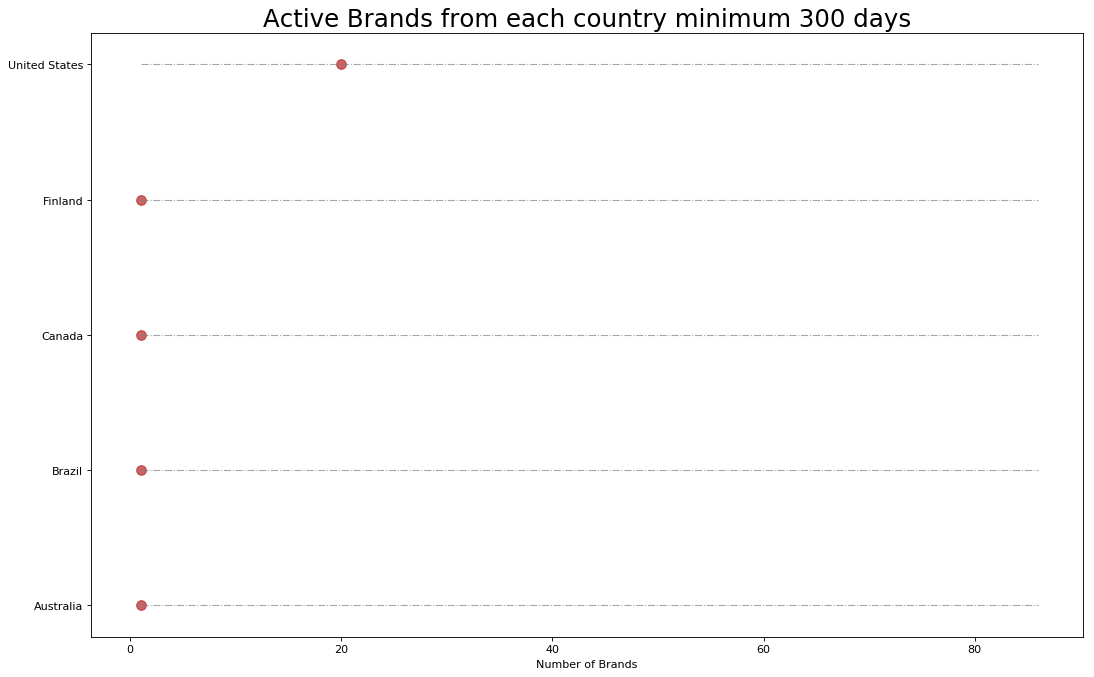

In [8]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=each.index, xmin=1, xmax=86, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=each.index, x=each.counts, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Active Brands from each country minimum 300 days', fontdict={'size':22})
ax.set_xlabel('Number of Brands')
ax.set_yticks(each.index)
ax.set_yticklabels(each.address_country.str.title(), fontdict={'horizontalalignment': 'right'})
#ax.set_xlim(10, 27)
plt.show()

In [9]:
whole = df1.groupby('product_category').size().reset_index(name='counts')
#p = country.groupby('product_category').size().reset_index(name='counts')
whole.sort_values(by=['counts'],inplace=True,ascending=False)
whole.reset_index(inplace=True,drop=True)
whole


,product_category,counts
0,Apparel & Jewelry,102
1,Food & Beverage,77
2,Health & Medical,68
3,Marketing,55
4,Personal Care,43
5,Lifestyle Services,31
6,Software & Services,31
7,Art,30
8,Commercial & Professional Services,26
9,Sports,23


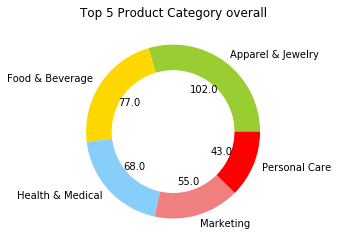

In [10]:
import matplotlib.pyplot as plt
import numpy
def absolute_value(val):
    a  = numpy.round(val/100.*size.sum(), 0)
    return a
# create data
#size_of_groups=[whole['counts'][0],whole['counts'][1],whole['counts'][2],whole['counts'][3],whole['counts'][4]]
size = numpy.array([i for i in whole['counts'][0:5]])
#labels = [whole['product_category'][0],whole['product_category'][1],whole['product_category'][2],whole['product_category'][3],whole['product_category'][4]]
labels = [item for item in whole['product_category'][0:5]]
# Create a pieplot
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red']
plt.pie(size,labels=labels,colors=colors,autopct=absolute_value)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Top 5 Product Category overall") 
plt.show()

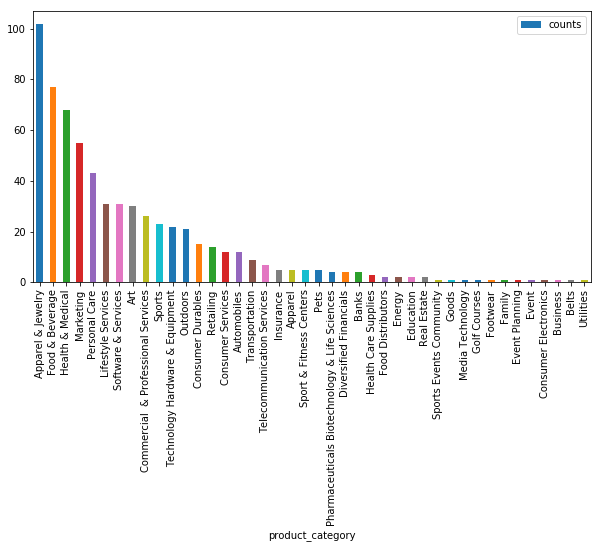

In [11]:
import matplotlib.pyplot as plt
whole.plot(kind='bar',x='product_category',y = 'counts',figsize=(10,5))

In [12]:
df2 = df1.dropna(subset=['address_country'])
df3 = df2.groupby('address_country').size().reset_index(name='counts')
df3.sort_values(by=['counts'],inplace=True,ascending=False)
df3.reset_index(inplace=True,drop=True)
df3['counts'][0]


389

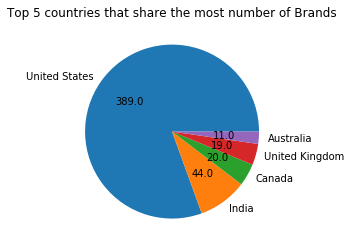

"pie = df3[:5]\n#pie.plot(kind='pie',subplots=True)\npie.plot(kind = 'pie',y='counts',labels=pie['address_country'])"

In [13]:
def absolute_value(val):
    a  = numpy.round(val/100.*values.sum(), 0)
    return a
#values1 = [df3['counts'][0]]
values = numpy.array([i for i in df3['counts'][0:5]])
#labels = [df3['address_country'][0]]
labels = [j for j in df3['address_country'][0:5]]
plt.pie(values,labels=labels,autopct=absolute_value)
plt.title("Top 5 countries that share the most number of Brands")
plt.show()
"""pie = df3[:5]
#pie.plot(kind='pie',subplots=True)
pie.plot(kind = 'pie',y='counts',labels=pie['address_country'])"""

In [14]:
country = df1.loc[df1['address_country']=='United States']

In [15]:
country['diff'] = country['last_active'] - country['created']
print(type(country))
country['diff'] = country['diff'].dt.days.astype('int16')

#last = country[country['diff'] <= 10]
#last



#country['diff'] = country['diff'].to_frame().reset_index()
#country['diff']

<class 'pandas.core.frame.DataFrame'>


c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
diff = country[country['diff'] >= 300]
#diff1 = diff[diff['address_country']=='United States']
diff.sort_values(by=['diff'],inplace=True,ascending=False)
diff1 = diff.groupby('product_category').size().reset_index(name='counts')
diff1.sort_values(by=['counts'],inplace=True,ascending=False)
diff1.reset_index(inplace=True,drop=True)
diff1

c:\users\what's in\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,product_category,counts
0,Health & Medical,5
1,Personal Care,4
2,Marketing,3
3,Apparel & Jewelry,1
4,Art,1
5,Consumer Durables,1
6,Food & Beverage,1
7,Pets,1
8,Sports,1


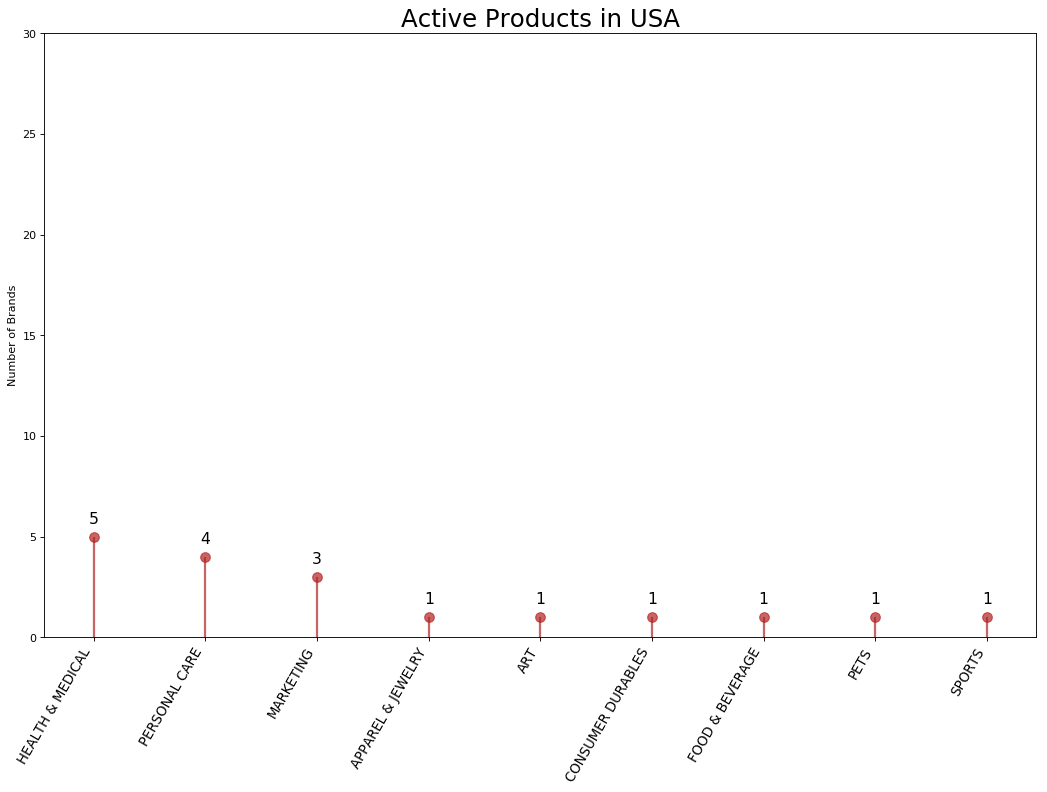

In [18]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=diff1.index, ymin=0, ymax=diff1.counts, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=diff1.index, y=diff1.counts, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Active Products in USA', fontdict={'size':22})
ax.set_ylabel('Number of Brands')
ax.set_xticks(diff1.index)
ax.set_xticklabels(diff1.product_category.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in diff1.itertuples():
    ax.text(row.Index, row.counts+.5, s=round(row.counts, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

In [19]:
p = country.groupby('product_category').size().reset_index(name='counts')
p.sort_values(by=['counts'],inplace=True,ascending=False)
usa = p[:10]
usa

,product_category,counts
12,Food & Beverage,56
1,Apparel & Jewelry,55
15,Health & Medical,46
19,Marketing,30
21,Personal Care,26
2,Art,17
18,Lifestyle Services,15
20,Outdoors,11
26,Software & Services,10
8,Consumer Durables,10


Text(0.5, 1.0, 'Top products in USA')

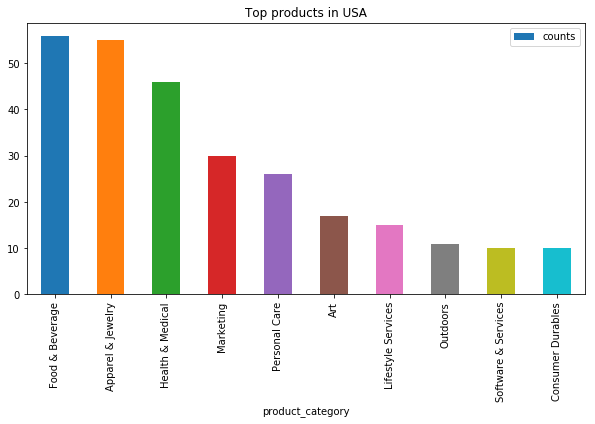

In [21]:
import matplotlib.pyplot as plt
usa.plot(kind='bar',x='product_category',y = 'counts',figsize=(10,5))
plt.title("Top products in USA")
#plt.xticks(rotation=30)